This is a notebook for capstone project model training and testing.

In [1]:
# imoort packages

import pandas as pd
import numpy as np 
import itertools
import math 
import datetime
import time
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
import os
import operator
import random

In [3]:
import cv2 as cv

In [4]:
# import keras

import keras

from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

/Users/littleapple/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/littleapple/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/littleapple/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/littleapple/anaconda3/

I use the transfer learning approach to train our ConvNet faster. The pre-trained model is VGG16.

In [5]:
# set default sizes of training and test images
img_width, img_height = 536, 536

In [6]:
# read our datasets

train_data_dir = '/Users/littleapple/Desktop/stemcell_hackathon/initial_cnn/train'
validation_data_dir = '/Users/littleapple/Desktop/stemcell_hackathon/initial_cnn/validation'
test_data_dir = '/Users/littleapple/Desktop/stemcell_hackathon/initial_cnn/test'

In [7]:
# set number of epochs to train top model 
epochs = 15 #this has been changed after multiple model run 

# set batch size
batch_size = 50

In [8]:
# set model path by creating a bottleneck file
top_model_weights_path = 'sc_initial_cnn_model.h5'

In [9]:
# import pre-trained model VGG16
vgg16 = applications.VGG16(include_top=False, weights='imagenet')

In [10]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [11]:
# generate the training feature file
# once the .npy files have been created, no need to run again

start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_train_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_train = int(math.ceil(nb_train_samples / batch_size)) 
 
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train) 
 
np.save('sc_initial_cnn_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
#print ('Time:', elapsed)

Found 3051 images belonging to 3 classes.


In [16]:
# apply transfer-learning model on training data
generator_top = datagen.flow_from_directory( 
   train_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_train_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the features generated before
train_data = np.load('sc_initial_cnn_features_train.npy') 
 
# get the class labels for the training data in its original order 
train_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 3051 images belonging to 3 classes.


In [18]:
# generate the validation feature file

start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_validation_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_validation = int(math.ceil(nb_validation_samples / batch_size)) 
 
bottleneck_features_validation = vgg16.predict_generator(generator, predict_size_validation) 
 
np.save('sc_initial_cnn_features_validation.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
#print ('Time:', elapsed)

Found 740 images belonging to 3 classes.


In [19]:
# apply transfer-learning model on validation data
generator_top = datagen.flow_from_directory( 
   validation_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_validation_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
validation_data = np.load('sc_initial_cnn_features_validation.npy') 
 
# get the class labels for the training data, in the original order 
validation_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 740 images belonging to 3 classes.


In [20]:
# generate the test feature file

start = datetime.datetime.now()
 
generator = datagen.flow_from_directory( 
    test_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode=None, 
    shuffle=False) 
 
nb_test_samples = len(generator.filenames) 
num_classes = len(generator.class_indices) 
 
predict_size_test = int(math.ceil(nb_test_samples / batch_size)) 
 
bottleneck_features_test = vgg16.predict_generator(generator, predict_size_test) 
 
np.save('sc_initial_cnn_features_test.npy', bottleneck_features_test)
end= datetime.datetime.now()
elapsed= end-start
#print ('Time:', elapsed)

Found 306 images belonging to 3 classes.


In [21]:
# apply transfer-learning model on test data
generator_top = datagen.flow_from_directory( 
   test_data_dir, 
   target_size=(img_width, img_height), 
   batch_size=batch_size, 
   class_mode='categorical', 
   shuffle=False) 
 
nb_test_samples = len(generator_top.filenames) 
num_classes = len(generator_top.class_indices) 
 
# load the bottleneck features saved earlier 
test_data = np.load('sc_initial_cnn_features_test.npy') 
 
# get the class labels for the training data, in the original order 
test_labels = generator_top.classes 
 
# convert the training labels to categorical vectors 
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 306 images belonging to 3 classes.


In [17]:
# train our ConvNet

start = datetime.datetime.now()
model = Sequential() 
model.add(Flatten(input_shape=train_data.shape[1:])) 
model.add(Dense(400, activation=keras.layers.LeakyReLU(alpha=0.28))) 
model.add(Dropout(0.5)) 
model.add(Dense(200, activation=keras.layers.LeakyReLU(alpha=0.28))) 
model.add(Dropout(0.5)) 
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
   optimizer=optimizers.Adam(lr=1e-4),
   metrics=['acc'])
history = model.fit(train_data, train_labels, 
   epochs=205,
   batch_size=batch_size, 
   validation_data=(validation_data, validation_labels))
model.save_weights(top_model_weights_path)
(eval_loss, eval_accuracy) = model.evaluate( 
    validation_data, validation_labels, batch_size=batch_size, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100)) 
print("[INFO] Loss: {}".format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ("Time: ", elapsed)

/Users/littleapple/anaconda3/lib/python3.6/site-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 4066 samples, validate on 974 samples
Epoch 1/205
4066/4066 [==============================] - 2s 525us/step - loss: 1.4181 - acc: 0.3483 - val_loss: 1.0527 - val_acc: 0.6088
Epoch 2/205
4066/4066 [==============================] - 1s 284us/step - loss: 1.1045 - acc: 0.5081 - val_loss: 0.9101 - val_acc: 0.6468
Epoch 3/205
4066/4066 [==============================] - 1s 312us/step - loss: 0.9698 - acc: 0.5878 - val_loss: 0.8331 - val_acc: 0.6807
Epoch 4/205
4066/4066 [==============================] - 1s 322us/step - loss: 0.8985 - acc: 0.6166 - val_loss: 0.7874 - val_acc: 0.6982
Epoch 5/205
4066/4066 [==============================] - 1s 322us/step - loss: 0.8193 - acc: 0.6650 - val_loss: 0.7522 - val_acc: 0.6982
Epoch 6/205
4066/4066 [==============================] - 1s 295us/step - loss: 0.7875 - acc: 0.6761 - val_loss: 0.7257 - val_acc: 0.7105
Epoch 7/205
4066/4066 [==============================] - 1s 300us/step - loss: 0.7675 - acc: 0.6852 - val_loss: 0.7090 - val_acc: 0

4066/4066 [==============================] - 1s 319us/step - loss: 0.3880 - acc: 0.8460 - val_loss: 0.5975 - val_acc: 0.7690
Epoch 61/205
4066/4066 [==============================] - 1s 323us/step - loss: 0.3851 - acc: 0.8470 - val_loss: 0.5960 - val_acc: 0.7762
Epoch 62/205
4066/4066 [==============================] - 1s 325us/step - loss: 0.3908 - acc: 0.8480 - val_loss: 0.5900 - val_acc: 0.7813
Epoch 63/205
4066/4066 [==============================] - 2s 373us/step - loss: 0.3890 - acc: 0.8515 - val_loss: 0.5943 - val_acc: 0.7741
Epoch 64/205
4066/4066 [==============================] - 1s 327us/step - loss: 0.3805 - acc: 0.8517 - val_loss: 0.5993 - val_acc: 0.7710
Epoch 65/205
4066/4066 [==============================] - 1s 317us/step - loss: 0.3836 - acc: 0.8512 - val_loss: 0.5928 - val_acc: 0.7782
Epoch 66/205
4066/4066 [==============================] - 1s 304us/step - loss: 0.3722 - acc: 0.8519 - val_loss: 0.5948 - val_acc: 0.7834
Epoch 67/205
4066/4066 [=======================

4066/4066 [==============================] - 1s 320us/step - loss: 0.1631 - acc: 0.9370 - val_loss: 0.8732 - val_acc: 0.7731
Epoch 179/205
4066/4066 [==============================] - 1s 296us/step - loss: 0.1600 - acc: 0.9380 - val_loss: 0.8879 - val_acc: 0.7628
Epoch 180/205
4066/4066 [==============================] - 1s 296us/step - loss: 0.1540 - acc: 0.9412 - val_loss: 0.8833 - val_acc: 0.7690
Epoch 181/205
4066/4066 [==============================] - 1s 295us/step - loss: 0.1523 - acc: 0.9424 - val_loss: 0.8737 - val_acc: 0.7680
Epoch 182/205
4066/4066 [==============================] - 1s 294us/step - loss: 0.1549 - acc: 0.9439 - val_loss: 0.8842 - val_acc: 0.7659
Epoch 183/205
4066/4066 [==============================] - 1s 298us/step - loss: 0.1552 - acc: 0.9400 - val_loss: 0.8994 - val_acc: 0.7628
Epoch 184/205
4066/4066 [==============================] - 1s 297us/step - loss: 0.1573 - acc: 0.9397 - val_loss: 0.8970 - val_acc: 0.7598
Epoch 185/205
4066/4066 [================

In [ ]:
# plot the accuracy both on training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training_acc')
plt.plot(epochs, val_acc, 'b', label='Validation_acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [15]:
# evaluate model accuracy
model.evaluate(test_data, test_labels)

[0.6347860319941652, 0.7000980403844047]


In [ ]:
# Now we can view the prediction results of our test set.

In [23]:
# print classification results of all test data
preds = np.round(model.predict(test_data),0)
preds_matrix = model.predict(test_data)
#print(preds_matrix)

In [25]:
# get the label list
symbol_directory = '/Users/littleapple/Desktop/stemcell_hackathon/initial_cnn/train'
d1lst = [x[1] for x in os.walk(symbol_directory)]
symbols = d1lst[0]

In [9]:
# define a function to show top k prediction results

def top_k_labels(nparr, labellist, k):
    
    ind = np.argpartition(nparr, -k)[-k:]
    dic = dict(zip(ind,nparr[ind]))
    
    sorted_dic = sorted(dic.items(),key=operator.itemgetter(1),reverse=True)
    
    print('The most possible predictions for this image are: ')
    
    for predpair in sorted_dic:
        print(str(labellist[predpair[0]])+" : "+str(predpair[1]))
        
    return sorted_dic

In [15]:
# randomly select a test image
rand_ind = random.randrange(0, len(generator_top.filenames), 1)

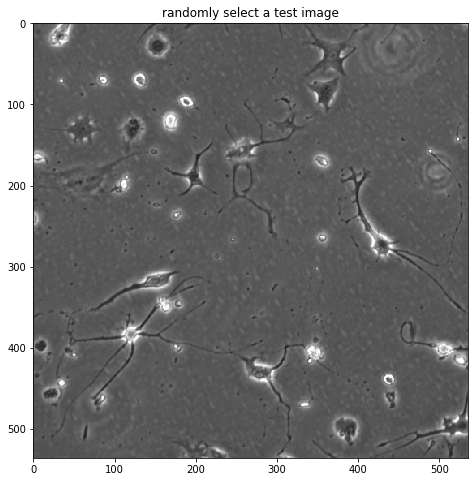

In [13]:
# show the selected image
test_img1 = cv.imread(test_imgpath+test_imgname, -1)
plt.figure(figsize=(8,8))
plt.imshow(test_img1)
plt.title('randomly select a test image')
plt.show()

In [11]:
pred_rand = preds_matrix[rand_ind]
top_k_labels(pred_rand, symbols,1)

The most possible prediction stage and possibility for this stem cell image are:
maturation: 0.78988486
